In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df9 = pd.read_csv("../trigger/case9_stats_history.csv")
df10 = pd.read_csv("../trigger/case10_stats_history.csv")
df11 = pd.read_csv("../trigger/case11_stats_history.csv")
df12 = pd.read_csv("../trigger/case12_stats_history.csv")
df13 = pd.read_csv("../trigger/case13_stats_history.csv")
df14 = pd.read_csv("../trigger/case14_stats_history.csv")

In [6]:
df = [df9, df10, df11, df12, df13, df14]
col = ["Total Average Response Time", "Total Min Response Time", "Total Max Response Time"]
df_plot = pd.DataFrame(columns = ["Response Time", "User Count"])
for df_tmp in df:
    user_cnt = df_tmp["User Count"].iloc[-1]
    df_tmp = df_tmp[col].iloc[[-1],:]
    df_tmp.index = ["Response Time"]
    df_tmp = df_tmp.transpose().reset_index(drop = True)
    df_tmp["User Count"] = user_cnt
    df_plot = pd.concat((df_plot, df_tmp))

/var/folders/1y/c37lmtr53c92dcdgqfyzl59w0000gn/T/ipykernel_1225/4143572339.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_plot = pd.concat((df_plot, df_tmp))


In [43]:
df_plot1 = df_plot.copy()
df_plot1["Architecture"] = "Federated"
df_plot2 = df_plot.copy()
df_plot2["Architecture"] = "Centralized"
df_plot3 = df_plot.copy()
df_plot3["Architecture"] = "Decentralized"
df_plot_group = pd.concat((df_plot1, df_plot2, df_plot3))

In [ ]:
plt.errorbar

<Axes: xlabel='User Count', ylabel='Response Time'>

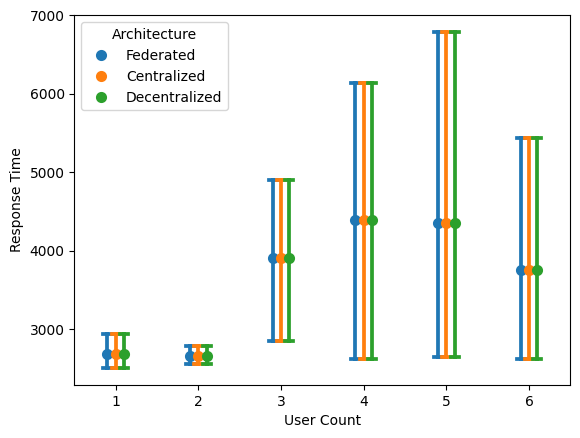

In [44]:
sns.pointplot(
    data=df_plot_group, 
    x="User Count", 
    y="Response Time", 
    hue="Architecture",
    linestyle='', dodge=.2, capsize=.1,
    marker=".", markersize=10, markeredgewidth=3)

In [46]:
df_plot_group

,Response Time,User Count,Architecture
0,2589.757967,1,Federated
1,2505.233041,1,Federated
2,2938.468708,1,Federated
0,2639.527842,2,Federated
1,2559.722833,2,Federated
2,2789.046541,2,Federated
0,3978.235138,3,Federated
1,2847.400500,3,Federated
2,4906.819917,3,Federated
0,4423.408115,4,Federated


https://seaborn.pydata.org/generated/seaborn.barplot.html

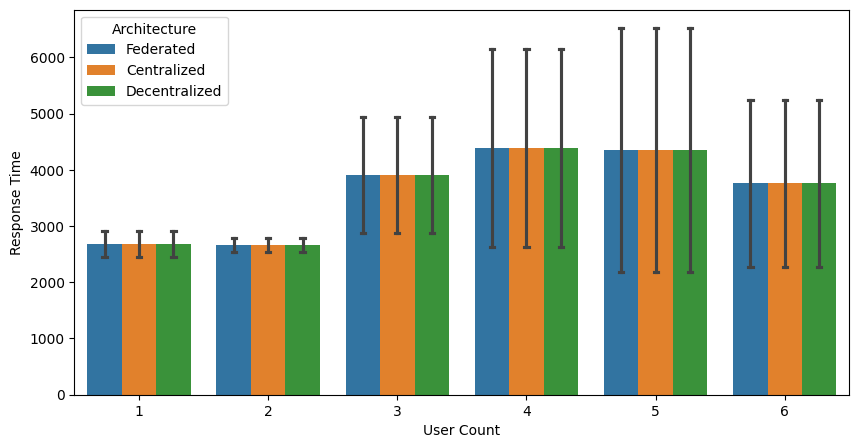

In [52]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=df_plot_group, 
    x="User Count", 
    y="Response Time", 
    hue="Architecture",
    errorbar="sd",
    linestyle='', dodge=.5, capsize=.1)
plt.show()